In [1]:
## install the tweepy library
!pip install tweepy
import tweepy

## library for dataframe manipultions
import pandas as pd

## library for scientific computing
import numpy as np

## library for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Twitter App access keys for @user

# Consume:
CONSUMER_KEY    = '***********'
CONSUMER_SECRET = '**************'

# Access:
ACCESS_TOKEN  = '****************************'
ACCESS_SECRET = '****************************'

In [3]:
## installin the credentials library
!pip install credentials
from credentials import *
def twitter_setup():
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [4]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="narendramodi",count=200)


In [5]:
tweets

[Status(_api=<tweepy.api.API object at 0x000000000C0B9BE0>, _json={'created_at': 'Thu Nov 02 12:05:57 +0000 2017', 'id': 926057792024190978, 'id_str': '926057792024190978', 'text': 'BJP is committed to ensuring record development in Himachal Pradesh &amp; fulfilling aspirations of the states’s youth.… https://t.co/K7Ub0wnKWl', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/K7Ub0wnKWl', 'expanded_url': 'https://twitter.com/i/web/status/926057792024190978', 'display_url': 'twitter.com/i/web/status/9…', 'indices': [121, 144]}]}, 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 18839785, 'id_str': '18839785', 'name': 'Narendra Modi', 'screen_name': 'narendramodi', 'location': 'India', 'description': 'Prime Minister of I

In [7]:
## filtering english tweets from all tweets and printing
for tweet in tweets:
    if tweet.lang=="en":
      print(tweet.text)
      print()

BJP is committed to ensuring record development in Himachal Pradesh &amp; fulfilling aspirations of the states’s youth.… https://t.co/K7Ub0wnKWl

Congress has become a laughing club. They are non-serious about important issues and are heavily involved in corrup… https://t.co/Edl4XLN9Uj

Addressed rallies in Kangra and Sirmaur. Here are some pictures. https://t.co/TMY5sJ9Yqn

Presented the Prince of Bhutan an official football from the FIFA U-17 World Cup and a chess set. https://t.co/91xLRURPnJ

Had a wonderful meeting with the King, Queen and Prince of Bhutan. https://t.co/6dWDoNL1jv

Strongly condemn the terror attack in New York City. My thoughts are with the families of the deceased &amp; prayers with those injured.

Guided by the Mantra of ‘Reform, Perform &amp; Transform’ we are determined to further improve our rankings &amp; scale greater economic growth.

It has never been easier to do business in India. India welcomes the world to explore economic opportunities our nation has

In [8]:
## creating a dataframe with tweets
data = pd.DataFrame(data=[tweet.text for tweet in tweets if tweet.lang=="en"], columns=['Tweets'])

## displaying the first five rows of data frame
data.head()

,Tweets
0,BJP is committed to ensuring record developmen...
1,Congress has become a laughing club. They are ...
2,Addressed rallies in Kangra and Sirmaur. Here ...
3,Presented the Prince of Bhutan an official foo...
4,"Had a wonderful meeting with the King, Queen a..."


In [9]:
## creating the column which has length of tweet
data['len']  =data["Tweets"].apply(len)

## creating the column which has ID of tweet
data['ID']   = np.array([tweet.id for tweet in tweets if tweet.lang=="en"])

## creating the column which has the date when it is tweeted
data['Date'] = np.array([tweet.created_at for tweet in tweets if tweet.lang=="en"])

##creating the column which has source of tweet
data['Source'] = np.array([tweet.source for tweet in tweets if tweet.lang=="en"])

## creating the column for likes of each tweet
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets if tweet.lang=="en"])

## creating the column for number of re-tweets
data['Re-Tweets']    = np.array([tweet.retweet_count for tweet in tweets if tweet.lang=="en"])
data.head(30)

,Tweets,len,ID,Date,Source,Likes,Re-Tweets
0,BJP is committed to ensuring record developmen...,144,926057792024190978,2017-11-02 12:05:57,Twitter Web Client,1577,490
1,Congress has become a laughing club. They are ...,140,926057201126465536,2017-11-02 12:03:36,Media Studio,1806,603
2,Addressed rallies in Kangra and Sirmaur. Here ...,88,926056565219631104,2017-11-02 12:01:05,Twitter Web Client,1619,511
3,Presented the Prince of Bhutan an official foo...,121,925763161374027776,2017-11-01 16:35:12,Twitter for iPhone,29275,5457
4,"Had a wonderful meeting with the King, Queen a...",90,925762725933977600,2017-11-01 16:33:28,Twitter for iPhone,21418,4098
5,Strongly condemn the terror attack in New York...,136,925546219946029057,2017-11-01 02:13:09,Twitter for iPhone,20431,5295
6,"Guided by the Mantra of ‘Reform, Perform &amp;...",144,925371960405590016,2017-10-31 14:40:42,Twitter Web Client,14994,4139
7,It has never been easier to do business in Ind...,133,925371871255605248,2017-10-31 14:40:21,Twitter Web Client,22825,6193
8,Over the last 3 years we have seen a spirit of...,138,925371682914574336,2017-10-31 14:39:36,Twitter Web Client,9521,2658
9,Easier business environment is leading to hist...,144,925371584486842368,2017-10-31 14:39:12,Twitter Web Client,9968,2862


In [12]:
## printing maximum retweets value

print("the maximum number of re-tweets is:")
data["Re-Tweets"].max()

the maximum number of re-tweets is:


9582

In [13]:
## printing the tweet which has maximum re-tweets

print("the most re-tweeted tweet is:")
data.loc[data["Re-Tweets"].idxmax(),"Tweets"]

the most re-tweeted tweet is:


'Glad to have celebrated Diwali with our brave Army and BSF Jawans in the Gurez Valley, Jammu and Kashmir. https://t.co/ebCM4JO6jc'

In [14]:
## printing maximum likes

print("the maximum number of likes is:")
data["Likes"].max()

the maximum number of likes is:


38316

In [15]:
## printing the tweet which has maximum likes

print("the most liked tweet is:")
data.loc[data["Likes"].idxmax(),"Tweets"]

the most liked tweet is:


'Heartiest greetings to my dear friend @AbeShinzo on his big election win. Look forward to further strengthen India-Japan relations with him.'

In [17]:
## creating a new dataframe with date as index for time series analysis
data2=data.set_index("Date")

In [18]:
data2.head(40)

,Tweets,len,ID,Source,Likes,Re-Tweets
Date,,,,,,
2017-11-02 12:05:57,BJP is committed to ensuring record developmen...,144,926057792024190978,Twitter Web Client,1577,490
2017-11-02 12:03:36,Congress has become a laughing club. They are ...,140,926057201126465536,Media Studio,1806,603
2017-11-02 12:01:05,Addressed rallies in Kangra and Sirmaur. Here ...,88,926056565219631104,Twitter Web Client,1619,511
2017-11-01 16:35:12,Presented the Prince of Bhutan an official foo...,121,925763161374027776,Twitter for iPhone,29275,5457
2017-11-01 16:33:28,"Had a wonderful meeting with the King, Queen a...",90,925762725933977600,Twitter for iPhone,21418,4098
2017-11-01 02:13:09,Strongly condemn the terror attack in New York...,136,925546219946029057,Twitter for iPhone,20431,5295
2017-10-31 14:40:42,"Guided by the Mantra of ‘Reform, Perform &amp;...",144,925371960405590016,Twitter Web Client,14994,4139
2017-10-31 14:40:21,It has never been easier to do business in Ind...,133,925371871255605248,Twitter Web Client,22825,6193
2017-10-31 14:39:36,Over the last 3 years we have seen a spirit of...,138,925371682914574336,Twitter Web Client,9521,2658


In [19]:
## resampling the dataframe weekly to know how many tweest per week
data3=data2[["Tweets"]].resample("W").count()

In [20]:
data3

,Tweets
Date,
2017-10-22,63
2017-10-29,70
2017-11-05,33


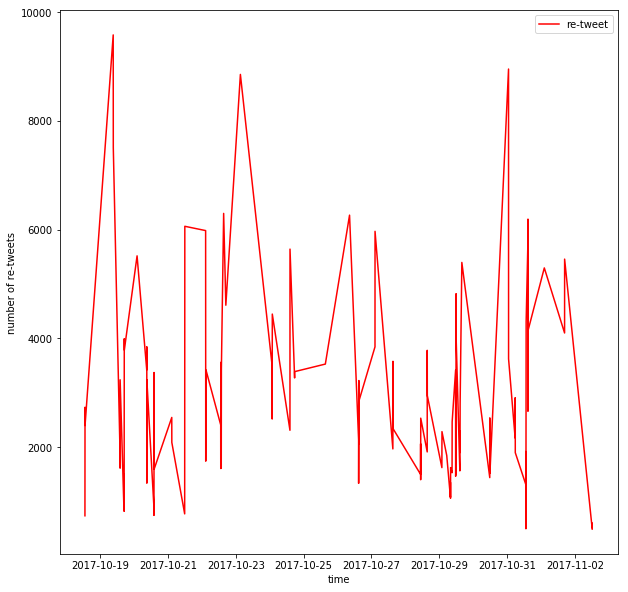

In [21]:
## date vs number of re-tweets

plt.figure(figsize=(10,10))
plt.xlabel("time")
plt.ylabel("number of re-tweets")
plt.plot(data2[["Re-Tweets"]],color="red",label="re-tweet")
plt.legend()

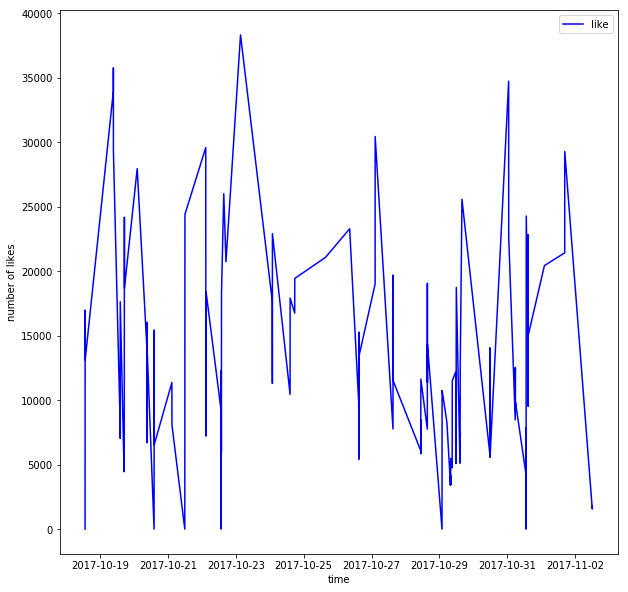

In [22]:
## dates vs number of likes
plt.figure(figsize=(10,10))
plt.xlabel("time")
plt.ylabel("number of likes")
plt.plot(data2[["Likes"]],color="blue",label="like")
plt.legend()

In [23]:
### cleaning the texts
import re

## importing the natural language processing toolkit
import nltk

## downloading the stopwords
nltk.download("stopwords")
from nltk.corpus import stopwords

## importing library for stemming of words
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\good\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
cleaned_tweets=[]
for i in range(0,166):
    ## removing the numericals,addresses,....keeping only english letters
    review=re.sub('[^a-zA-Z]'," ",data.loc[i,"Tweets"])
    
    ## lowering the text
    review=review.lower()
    
    ## creating a list by splitting the tweets into words
    review=review.split()
    
    ##stemming of each word in the list
    ps=PorterStemmer()
    review=[ps.stem(word) for word in review if not word in stopwords.words("english")]
    
    ## rejoining each tweet
    review=" ".join(review)
    
    ## appending the cleaned tweet to a list
    cleaned_tweets.append(review)

In [26]:
cleaned_tweets

['bjp commit ensur record develop himach pradesh amp fulfil aspir state youth http co k ub wnkwl',
 'congress becom laugh club non seriou import issu heavili involv corrup http co edl xln uj',
 'address ralli kangra sirmaur pictur http co tmi sj yqn',
 'present princ bhutan offici footbal fifa u world cup chess set http co xlrurpnj',
 'wonder meet king queen princ bhutan http co dwdonl jv',
 'strongli condemn terror attack new york citi thought famili deceas amp prayer injur',
 'guid mantra reform perform amp transform determin improv rank amp scale greater econom growth',
 'never easier busi india india welcom world explor econom opportun nation offer',
 'last year seen spirit posit competit among state toward make busi easier benefici',
 'easier busi environ lead histor opportun entrepreneur particularli msme sector amp bring prosper',
 'histor jump eas busi rank outcom round amp multi sector reform push http co vekdr ndz',
 'congratul everyon took part run uniti gladden see initi ge

In [27]:
## importing textblob to check polarity of eact tweet
from textblob import TetBlob

In [28]:
list2=[]
for k in cleaned_tweets:
 analysis = TextBlob(k)
 
## condition for positive tweet
 if analysis.sentiment.polarity>0:
        list2.append(1)
## condition for neutral tweet        
 elif analysis.sentiment.polarity==0:
     list2.append(0)
    
## condition for negative tweet    
 else:
        list2.append(-1)       


In [29]:
## appending a column which describes the sentiment
data["SA"]=list2

In [30]:
data.head(30)

,Tweets,len,ID,Date,Source,Likes,Re-Tweets,SA
0,BJP is committed to ensuring record developmen...,144,926057792024190978,2017-11-02 12:05:57,Twitter Web Client,1577,490,0
1,Congress has become a laughing club. They are ...,140,926057201126465536,2017-11-02 12:03:36,Media Studio,1806,603,1
2,Addressed rallies in Kangra and Sirmaur. Here ...,88,926056565219631104,2017-11-02 12:01:05,Twitter Web Client,1619,511,0
3,Presented the Prince of Bhutan an official foo...,121,925763161374027776,2017-11-01 16:35:12,Twitter for iPhone,29275,5457,0
4,"Had a wonderful meeting with the King, Queen a...",90,925762725933977600,2017-11-01 16:33:28,Twitter for iPhone,21418,4098,0
5,Strongly condemn the terror attack in New York...,136,925546219946029057,2017-11-01 02:13:09,Twitter for iPhone,20431,5295,1
6,"Guided by the Mantra of ‘Reform, Perform &amp;...",144,925371960405590016,2017-10-31 14:40:42,Twitter Web Client,14994,4139,-1
7,It has never been easier to do business in Ind...,133,925371871255605248,2017-10-31 14:40:21,Twitter Web Client,22825,6193,0
8,Over the last 3 years we have seen a spirit of...,138,925371682914574336,2017-10-31 14:39:36,Twitter Web Client,9521,2658,0
9,Easier business environment is leading to hist...,144,925371584486842368,2017-10-31 14:39:12,Twitter Web Client,9968,2862,0


In [31]:
data["SA"].value_counts()

 0    98
 1    55
-1    13
Name: SA, dtype: int64

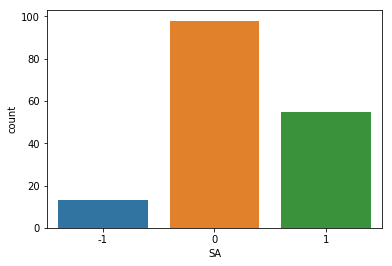

In [32]:
## bar graph of sentiments
sns.countplot(x="SA",data=data)

In [33]:
list3=[]
for i in range(-1,2):
 k=(data["SA"]==i).sum()
 list3.append(k)

([<matplotlib.patches.Wedge at 0x105c3630>,
  <matplotlib.text.Text at 0x105bb0f0>])

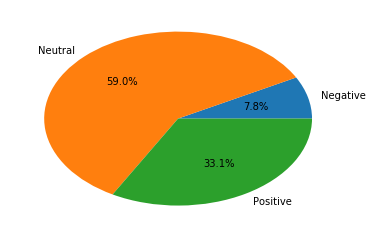

In [34]:
## pie chart showing percentage each 
plt.pie(list3,labels=["Negative","Neutral","Positive"],autopct='%1.1f%%')